In [68]:
%matplotlib notebook
import shutil
from glob import glob

from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa.display

import numpy as np
from scipy.interpolate import interp1d
from scipy import io


In [14]:
from microfaune import detection
from microfaune.audio import load_wav

In [15]:
detector = detection.RNNDetector()

In [44]:
def check_result(wav_file):
    sr, audio = load_wav(wav_file)
    x = np.array(detector.compute_features([audio]))
    
    s, local_s = detector.predict(x)
    s, local_s = s[0], local_s[0]
    plt.figure(figsize=(9, 6))

    plt.subplot(3, 1, 1)
    plt.title("Audio wave")
    librosa.display.waveplot(audio, sr)

    plt.subplot(3, 1, 2)
    plt.title("MEL spectrogram")
    
    librosa.display.specshow(np.rot90(x.squeeze(), -1))

    plt.subplot(3, 1, 3)
    plt.title("Local prediction")
    ax = plt.gca()
    ax.set_xlim(0, x.shape[0])
    ax.set_ylim(-0.05, 1.05)
    plt.plot(np.linspace(0, 1, local_s.size), local_s)
    return ipd.Audio(wav_file)

<IPython.core.display.Javascript object>


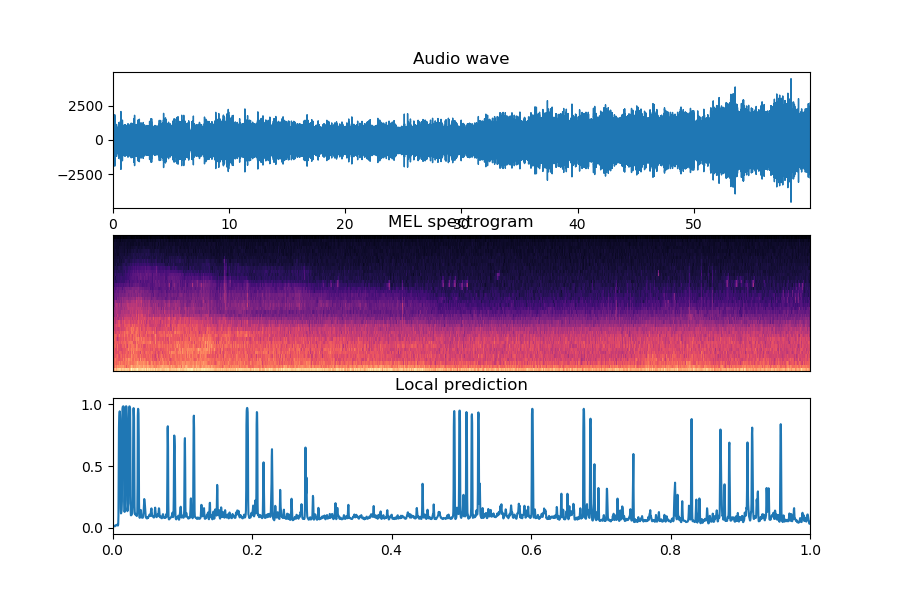

In [47]:
check_result("/home/florent/personnel/data/citeU/split/SWIFT_20190723_072011_7.wav")

In [63]:
out_dir = "/home/florent/personnel/data/results/"
os.makedirs(out_dir, exist_ok=True)

In [69]:
wav_files = glob("/home/florent/personnel/data/citeU/split/*.wav")

for wav_file in wav_files:
    sr, audio = load_wav(wav_file)
    x = np.array(detector.compute_features([audio]))

    s, local_s = detector.predict(x)
    s, local_s = s[0], local_s[0]

    duration = len(audio)/sr
    out_sr = 10
    interp_pred = interp1d(np.linspace(0, 1, len(local_s)), local_s)
    fake_audio = interp_pred(np.linspace(0, 1, duration*out_sr))

    shutil.copy(wav_file, out_dir)
    output_file = os.path.join(out_dir, os.path.basename(wav_file).replace(".wav", "_pred.wav"))
    io.wavfile.write(output_file, out_sr, fake_audio)

In [65]:
wav_file

'/home/florent/personnel/data/citeU/split/SWIFT_20190723_072011_7.wav'

In [66]:
wav_file.replace(".wav", "_pred.wav")

'/home/florent/personnel/data/citeU/split/SWIFT_20190723_072011_7_pred.wav'